<a href="https://colab.research.google.com/github/cjaucian/MAT421/blob/main/ModuleG_21_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21.4 Simpson's Rule

Simpson's Rule takes the approximation of the area under f(x) by looking at two subintervals, then fitting a quadratic polynomial through the points: (xi-1, f(xi-1)), (xi, f(xi)), and (xi+1, f(xi+1)). The polynomial is unique so it gives an exact integration of the quadratric.

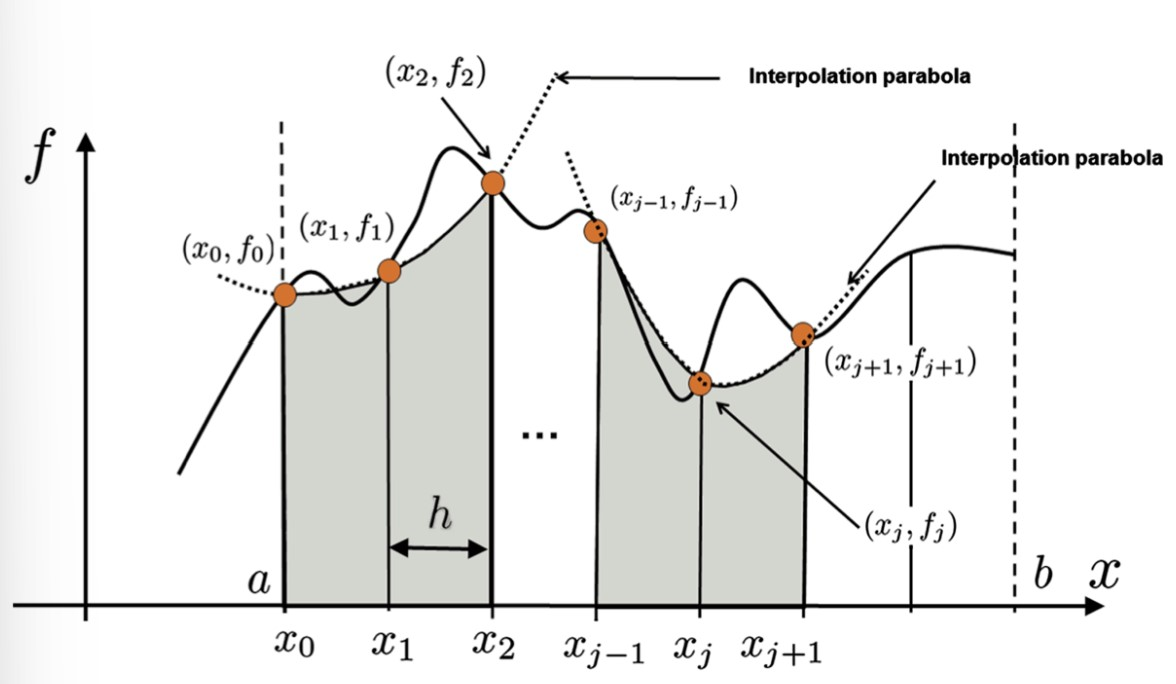

The above picture shows the approximation of the integral for an arbitrary function.

To create the the quadratic polynomial approximation we will first use Lagrange polynomials. Application of the formular for a Lagrange polynomial, then substituting for h will give us:
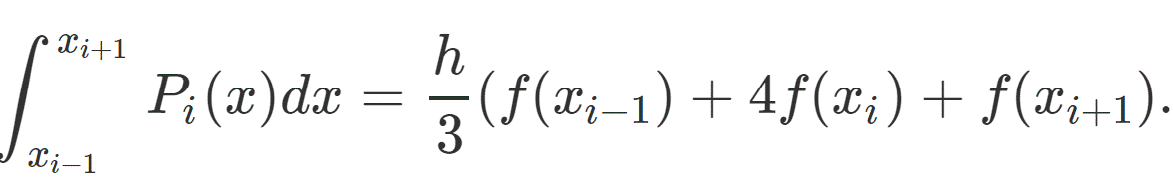

To use this approximation to find the integral from a to b, we need to add the integrals of Pi(x) for every two subintervals since Pi(x) goes across two subintervals. This can be done with the following formula:



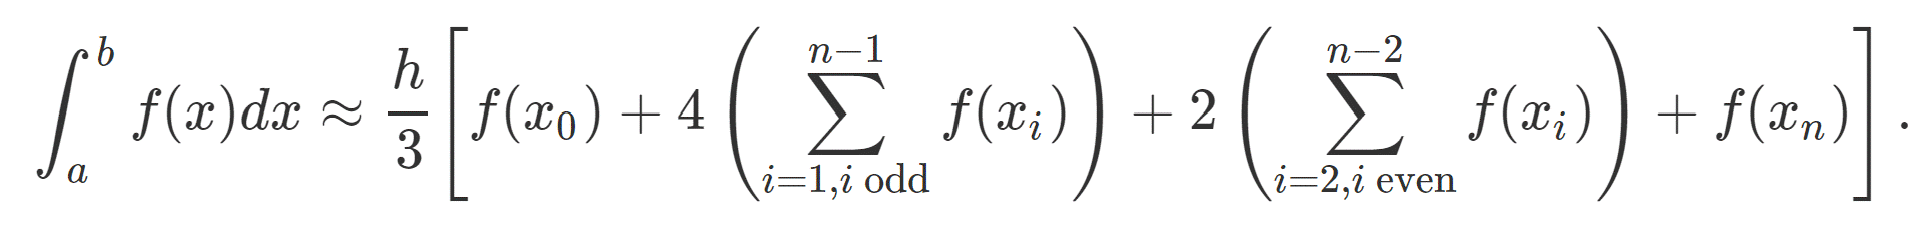

Something to keep in mind when using Simpson's Rule is that we must have an even number of intervals, this means there will be an odd number of grid points.

**Example**  Use Simpson's Rule to approximate the ∫sin(x)dx from 0 to π with 11 evenly spaced grid points over the whole interval. Compare this value to the exact value of 2.

In [ ]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a)/(n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])

err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


# 21.5 Computing Integrals in Python

Within Python there is a sub-package to help with the computation of integrals, scipy.integrate. One of several functions within scipy,integrate is the trapz function which approximates the integral by using an array of input values over the numerical grid x.

**Example**  Use the trapz function to approximate ∫sin(x)dx for 11 equally spaced points over the whole interval. Compare this value to the one computed using the Trapezoid Rule.

In [ ]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapz(f, x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.9835235375094546


In can also be helpful to see what the cumulative integral is when approximated. In this case we will use the cumtrapz function which uses the same input arguments as trapz did.

**Example**  Use the cumtrapz function to approximate the cumulative integral of f(x) = sin(x) from 0 to π with a discretization step of 0.01. The exact solution of this integral is F(x) = -cos(x). Plot the results.

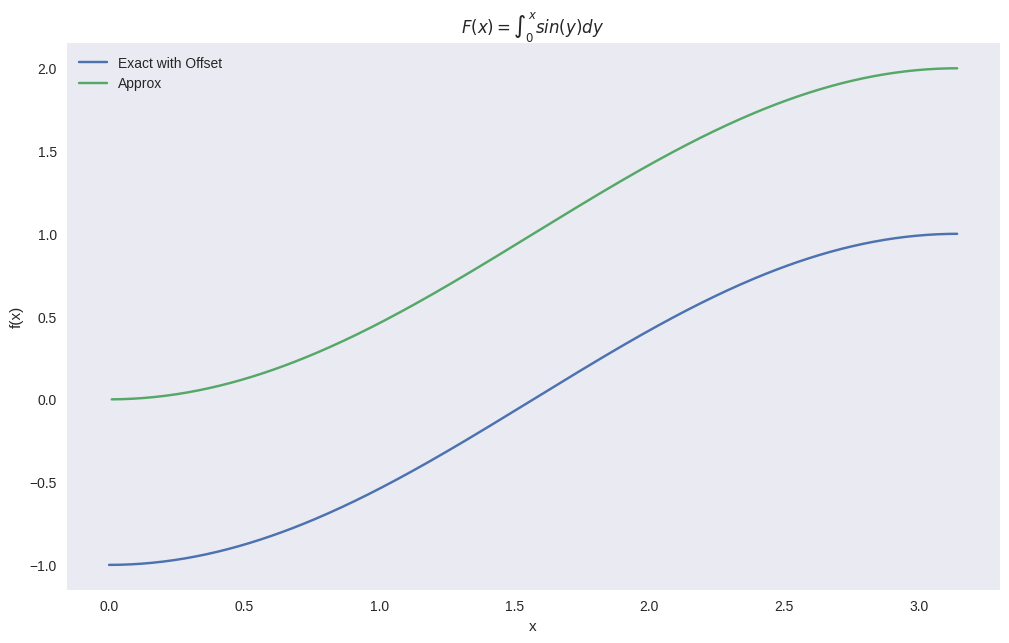

In [ ]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-v0_8')

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()


Another function for approximating integrals is quad(f, a, b). The quad function takes a function object defined as f and integrates from a to b.

**Example**  Use the integrate.quad function to compute ∫sin(x)dx from 0 to π. Compare your answer with the correct answer of 2.

In [ ]:
from scipy.integrate import quad

I_quad, est_err_quad = quad(np.sin, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0
